<a href="https://colab.research.google.com/github/exp0nent/Kaggle_Practice/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

Data collection and analysis

PIMA Diabetes Dataset on kaggle only female data


In [86]:
df = pd.read_csv('/content/diabetes.csv')

In [87]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [88]:
# pd.read_csv?

In [89]:
df.shape

(768, 9)

In [90]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [91]:
df['BMI'].value_counts()

,count
BMI,
32.0,13
31.6,12
31.2,12
0.0,11
32.4,10
...,...
49.6,1
24.1,1
41.2,1


/tmp/ipython-input-911373302.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_bmi.index, y=top_5_bmi.values, palette='viridis')


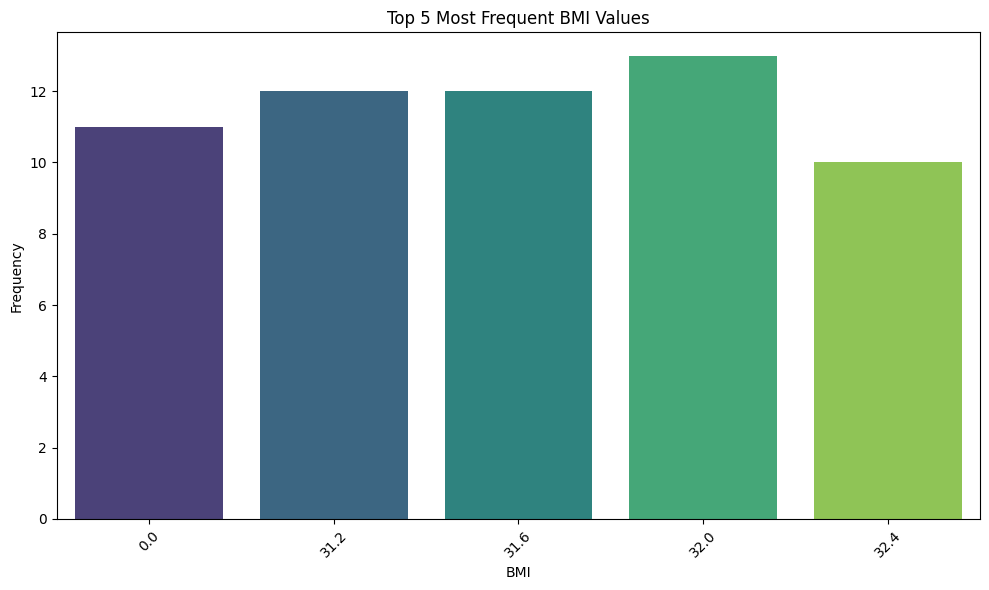

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 10 most frequent BMI values
top_5_bmi = df['BMI'].value_counts().nlargest(5)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_bmi.index, y=top_5_bmi.values, palette='viridis')
plt.title('Top 5 Most Frequent BMI Values')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [93]:
# Calculate the mean of non-zero BMI values
mean_bmi = df[df['BMI'] != 0]['BMI'].mean()

# Replace 0 values in 'BMI' with the calculated mean
df['BMI'] = df['BMI'].replace(0, mean_bmi)

# Verify the changes by checking the value counts again
display(df['BMI'].value_counts())

,count
BMI,
32.000000,13
31.600000,12
31.200000,12
32.457464,11
32.400000,10
...,...
49.600000,1
24.100000,1
41.200000,1


In [94]:
df['BloodPressure'].value_counts()

,count
BloodPressure,
70,57
74,52
78,45
68,45
72,44
64,43
80,40
76,39
60,37


In [95]:
# Calculate the mean of non-zero BMI values
mean_bmi = df[df['BloodPressure'] != 0]['BloodPressure'].mean()

# Replace 0 values in 'BMI' with the calculated mean
df['BloodPressure'] = df['BloodPressure'].replace(0, mean_bmi)

# Verify the changes by checking the value counts again
display(df['BloodPressure'].value_counts())

,count
BloodPressure,
70.000000,57
74.000000,52
78.000000,45
68.000000,45
72.000000,44
64.000000,43
80.000000,40
76.000000,39
60.000000,37


In [96]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,72.405184,20.536458,79.799479,32.457464,0.471876,33.240885,0.348958
std,3.369578,31.972618,12.096346,15.952218,115.244002,6.875151,0.331329,11.760232,0.476951
min,0.000000,0.000000,24.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,23.000000,30.500000,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [97]:
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


Here 0---> Non diabetes patient  
and  1---> Diabetes patient

In [98]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,70.935397,19.664000,68.792000,30.888434,0.429734,31.190000
1,4.865672,141.257463,75.147324,22.164179,100.335821,35.384757,0.550500,37.067164


Now we are seperating the data and labels

In [99]:
X = df.drop(columns = 'Outcome', axis=1)
y = df['Outcome']
print(X.head())
y.head()

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148           72.0             35        0  33.6   
1            1       85           66.0             29        0  26.6   
2            8      183           64.0              0        0  23.3   
3            1       89           66.0             23       94  28.1   
4            0      137           40.0             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  


,Outcome
0,1
1,0
2,1
3,0
4,1


## Now we are using the standardization function to standardize the data

In [100]:
scaler=StandardScaler()

In [101]:
scaler.fit(X)


StandardScaler()

In [102]:
standardize_data = scaler.transform(X)

In [103]:
print(standardize_data)

[[ 0.63994726  0.84832379 -0.03351824 ...  0.16629174  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.52985903 ... -0.85253118 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.69530596 ... -1.33283341  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087 -0.03351824 ... -0.91074963 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -1.02619983 ... -0.34311972 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192  -0.19896517 ... -0.29945588 -0.47378505
  -0.87137393]]


In [104]:
# Train test split:-

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

In [106]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


Traning the model

In [107]:
classifer = svm.SVC(kernel='linear')

In [108]:
# Traning the support vector machine classifer
classifer.fit(X_train, y_train)

SVC(kernel='linear')

In [109]:
'''# Seperate the data and labels
X = df.drop(columns = 'Outcome', axis=1)
y = df['Outcome']

# Standardize the data
scaler = StandardScaler()
standardize_data = scaler.fit_transform(X)

# Standardize the data
scaler = StandardScaler()
scaler.fit(X)
standardize_data = scaler.transform(X)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(standardize_data, y, test_size=0.2, stratify=y, random_state=2)

# Train the SVM model
classifer = svm.SVC(kernel='linear').fit(X_train, y_train)

classifer = svm.SVC(kernel='linear')
classifer.fit(X_train, y_train)'''

"# Seperate the data and labels\nX = df.drop(columns = 'Outcome', axis=1)\ny = df['Outcome']\n\n# Standardize the data\nscaler = StandardScaler()\nstandardize_data = scaler.fit_transform(X)\n\n# Standardize the data\nscaler = StandardScaler()\nscaler.fit(X)\nstandardize_data = scaler.transform(X)\n\n# Train test split\nX_train, X_test, y_train, y_test = train_test_split(standardize_data, y, test_size=0.2, stratify=y, random_state=2)\n\n# Train the SVM model\nclassifer = svm.SVC(kernel='linear').fit(X_train, y_train)\n\nclassifer = svm.SVC(kernel='linear')\nclassifer.fit(X_train, y_train)"

Model Evaluation  

Accuracy Score

In [110]:
# Accuracy score of the traning data
X_train_prediction = classifer.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [111]:
print("Accuracy score of the traning data:- " ,training_data_accuracy)

Accuracy score of the traning data:-  0.7752442996742671


In [112]:
# Accuracy score of the test data
X_test_prediction = classifer.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [113]:
print("Accuracy score of the test data:- " ,test_data_accuracy)

Accuracy score of the test data:-  0.7727272727272727


Making a Predictive System

In [114]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifer.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.3429808   1.41167241 -0.03351824 -0.09637905  0.82661621 -0.96896808
   0.34768723  1.51108316]]
[0]
The person is not diabetic


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [115]:
  input_data = (1,85,66,29,0,26.6,0.351,31)
  input_data_as_numpy_array = np.asarray(input_data)
  input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
  std_data = scaler.transform(input_data_reshaped)
  print(std_data)
  prediction = classifer.predict(std_data)
  print(prediction)
  if (prediction[0] == 0):
    print('The person is not diabetic')
  else:
    print('The person is diabetic')



[[-0.84488505 -1.12339636 -0.52985903  0.53090156 -0.69289057 -0.85253118
  -0.36506078 -0.19067191]]
[0]
The person is not diabetic


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
